## 라이브러리 불러오기

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler #표준화 스케일러
from sklearn.linear_model import LogisticRegression



## 로우 불러오기

In [11]:
diabetes_df = pd.read_csv(r"C:\data\diabetes.csv")
diabetes_df.info()
diabetes_df["Outcome"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


0    500
1    268
Name: Outcome, dtype: int64

In [12]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
from sklearn.preprocessing import Binarizer

def get_eval_by_thresholds(Y_test, pred_proba_c1, thresholds):
    #trhesholds list 객체 내의 값을 차례로 iteration 하면서 evaluation 수행
    for custom_thresholds in thresholds:
        binarizer = Binarizer(threshold =custom_thresholds).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값 : ", custom_thresholds)
        get_clf_eval(Y_test,custom_predict,pred_proba_c1)

In [16]:
def get_clf_eval(Y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    f1 = f1_score(Y_test, pred)
    roc_score = roc_auc_score(Y_test, pred_proba)
    
    print('오차행렬')
    print(confusion)
    print("정확도 {0:.4f}, 정밀도 {1:.4f}, 재현율 {2:.4f}, f1 {3:.4f}, AUC 값 : {4:.4f}".format(accuracy,precision,recall, f1,roc_score))
    


In [20]:
# 피쳐 데이터 세트 x, 레이블 데이터 세트 y 분리

X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

#로지스틱 회귀로 학습, 예측 및 수행
lr_clf = LogisticRegression(max_iter=300)
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도 0.7987, 정밀도 0.7674, 재현율 0.6111, f1 0.6804, AUC 값 : 0.8072


In [22]:
def precision_recall_curve_plot(Y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(Y_test, pred_proba_c1)
    
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall')
    
    plt.legend(); plt.grid()

    plt.show()


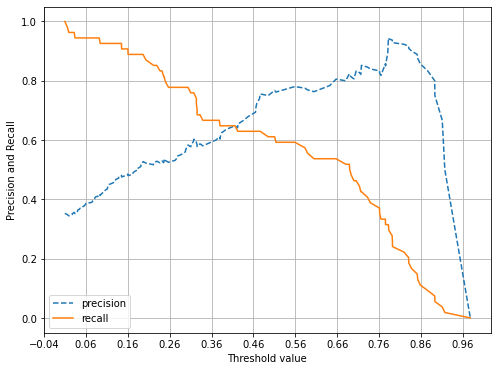

In [23]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

In [24]:
# 데이터 이상 여부 체크
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

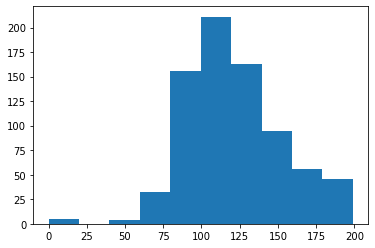

In [25]:
plt.hist(diabetes_df["Glucose"])

In [30]:

zero_features = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

total_count = diabetes_df["Glucose"].count()

for feature in zero_features:
    zero_count = diabetes_df[diabetes_df[feature] == 0][feature].count()
    print("{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%".format(feature,zero_count,100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [33]:
# 0인 데이터 건수가 많으므로, 이를 평균값으로 대체한다
mean_zero_featurs = diabetes_df[zero_features].mean()
diabetes_df[zero_features] = diabetes_df[zero_features].replace(0,mean_zero_featurs )
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify = y)

#로지스틱 회귀로 학습, 예측 및 수행
lr_clf = LogisticRegression(max_iter=300)
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도 0.7987, 정밀도 0.7674, 재현율 0.6111, f1 0.6804, AUC 값 : 0.8433


In [44]:
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.5]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_thresholds(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값 :  0.3
오차행렬
[[67 33]
 [11 43]]
정확도 0.7143, 정밀도 0.5658, 재현율 0.7963, f1 0.6615, AUC 값 : 0.8433
임곗값 :  0.33
오차행렬
[[72 28]
 [12 42]]
정확도 0.7403, 정밀도 0.6000, 재현율 0.7778, f1 0.6774, AUC 값 : 0.8433
임곗값 :  0.36
오차행렬
[[76 24]
 [15 39]]
정확도 0.7468, 정밀도 0.6190, 재현율 0.7222, f1 0.6667, AUC 값 : 0.8433
임곗값 :  0.39
오차행렬
[[78 22]
 [16 38]]
정확도 0.7532, 정밀도 0.6333, 재현율 0.7037, f1 0.6667, AUC 값 : 0.8433
임곗값 :  0.42
오차행렬
[[84 16]
 [18 36]]
정확도 0.7792, 정밀도 0.6923, 재현율 0.6667, f1 0.6792, AUC 값 : 0.8433
임곗값 :  0.45
오차행렬
[[85 15]
 [18 36]]
정확도 0.7857, 정밀도 0.7059, 재현율 0.6667, f1 0.6857, AUC 값 : 0.8433
임곗값 :  0.48
오차행렬
[[88 12]
 [19 35]]
정확도 0.7987, 정밀도 0.7447, 재현율 0.6481, f1 0.6931, AUC 값 : 0.8433
임곗값 :  0.5
오차행렬
[[90 10]
 [21 33]]
정확도 0.7987, 정밀도 0.7674, 재현율 0.6111, f1 0.6804, AUC 값 : 0.8433


In [48]:
binarizer = Binarizer(threshold = 0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차행렬
[[88 12]
 [19 35]]
정확도 0.7987, 정밀도 0.7447, 재현율 0.6481, f1 0.6931, AUC 값 : 0.8433
